# A Machine Learning Project on Credit Card Default Risk Classification


## Overview of Problem Statement


In the banking and financial sector, credit risk is a critical concern, as it directly influences the profitability and long-term stability of institutions. Banks issue credit cards based on a client’s financial standing and repayment capacity, yet there is always the possibility that some clients may fail to meet their payment obligations. Such credit defaults can lead to substantial financial losses.

The key challenge lies in accurately predicting whether a credit card holder is likely to default in the upcoming month, using factors such as demographic information, financial history, and repayment behavior. Early identification of high-risk clients enables financial institutions to take proactive measures—such as adjusting credit limits, offering repayment restructuring plans, or declining high-risk applications—to reduce potential losses.

# Project Objectives

Predict Credit Default
Build a supervised ML model to predict next-month credit-card default using demographic, financial, and repayment-history features. Target metrics: AUC ≥ 0.80, recall on defaulters ≥ 0.75, and well-calibrated probabilities (e.g., Brier score).

Identify Key Drivers
Quantify the most influential factors (e.g., recent repayment status, credit limit, bill and payment amounts) via model explainability (permutation importance, SHAP) and deliver a ranked feature list with actionable insights.

# Dataset & Source

 * Source: UCI Machine Learning Repository — Default of Credit Card Clients (Taiwan).

 * Target variable: default payment next month — whether the client defaulted the next month (1 = Yes, 0 = No).

* Feature Dictionary (selected)

### **Bill Amounts** (statement amounts at month-end)  
- **BILL_AMT1** — Bill amount for September  
- **BILL_AMT2** — Bill amount for August  
- **BILL_AMT3** — Bill amount for July  
- **BILL_AMT4** — Bill amount for June  
- **BILL_AMT5** — Bill amount for May  
- **BILL_AMT6** — Bill amount for April  

### **Payment Amounts** (amounts paid toward the corresponding statement)  
- **PAY_AMT1** — Paid amount in September  
- **PAY_AMT2** — Paid amount in August  
- **PAY_AMT3** — Paid amount in July  
- **PAY_AMT4** — Paid amount in June  
- **PAY_AMT5** — Paid amount in May  
- **PAY_AMT6** — Paid amount in April  


Note: The original description sometimes uses “Payed”; here we use “Paid” for clarity.

# IMPORTING ESSENTIAL LIBRARIES

In [1]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest,f_classif  

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

## READING CSV FILE

In [2]:
data=pd.read_csv('creditcard.csv')  #reading creditcard.csv file as data
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## CONVERTING IT TO DATAFRAME

In [3]:
df=pd.DataFrame(data)  #converting data into dataframe
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


## DESCRIPTIVE ANALYSIS

In [4]:
df.head(2)                  #first 2 entries of dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [5]:
df.tail(2)                   #last 2 entries of dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.shape #provides total no.of rows and columns in the df

(30000, 25)

In [7]:
df.size 

750000

In [8]:
df.columns   #all columns names in dataframe

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
df.info()  #provides all infomation about a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
df.describe()     #provides statistical measures of every numerical columns 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Data Cleaning and Preprocessing


### handling missing values


In [11]:
df.isnull().sum()  # checking for totalno.of null value values.   a missing or unknown value

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No Null values found in the dataset



In [12]:
df.isna().sum()    # checking for totalno.of nan value values. 
#an undefined value or value that cannot be represented, especially results of floating-point calculations.

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Handling duplicate values


In [13]:
df.duplicated().sum() #geting total no. of duplicate values

np.int64(0)

In [14]:
df.dtypes  #getting datatypes of all columns

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Renaming columns for better understanding of data

In [15]:
df=df.rename(columns={'PAY_0':'SEP_PAY','PAY_2':'AUG_PAY','PAY_3':'JUL_PAY','PAY_4':'JUN_PAY','PAY_5':'MAY_PAY','PAY_6':'APR_PAY'})
df=df.rename(columns={'BILL_AMT1':'SEP_BILL','BILL_AMT2':'AUG_BILL','BILL_AMT3':'JUL_BILL','BILL_AMT4':'JUN_BILL','BILL_AMT5':'MAY_BILL','BILL_AMT6':'APR_BILL'})
df=df.rename(columns={'PAY_AMT1':'SEP_PAYMENT','PAY_AMT2':'AUG_PAYMENT','PAY_AMT3':'JUL_PAYMENT','PAY_AMT4':'JUN_PAYMENT','PAY_AMT5':'MAY_PAYMENT','PAY_AMT6':'APR_PAYMENT'})
df=df.rename(columns={'default payment next month':'target'})


In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'target'],
      dtype='object')

## Replacing values inside columns for better understanding


In [17]:
#replacing values inside columns
df.replace({'SEX':{1:'M',2:'F'}},inplace=True)
df.replace({'MARRIAGE':{1:'MARRIED',2:'SINGLE',3:'OTHERS',0:'OTHERS'}},inplace=True)
df.replace({'EDUCATION':{1:'UG',2:'PG',3:'HIGH_SCHOOL',4:'OTHERS'}},inplace=True)
df.replace({'EDUCATION':{0:'OTHERS',5:'OTHERS',6:'OTHERS'}},inplace=True)
df.replace({'target':{1:'YES',0:'NO'}},inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,YES
1,2,120000,F,PG,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,YES
2,3,90000,F,PG,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,NO
3,4,50000,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NO
4,5,50000,M,PG,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,HIGH_SCHOOL,MARRIED,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,NO
29996,29997,150000,M,HIGH_SCHOOL,SINGLE,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,NO
29997,29998,30000,M,PG,SINGLE,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,YES
29998,29999,80000,M,HIGH_SCHOOL,MARRIED,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,YES


## Counting variable counts

In [18]:
df['target'].value_counts()

target
NO     23364
YES     6636
Name: count, dtype: int64

In [19]:
value_count=df['SEX'].value_counts()
print(value_count)

SEX
F    18112
M    11888
Name: count, dtype: int64


In [20]:
df['MARRIAGE'].value_counts()

MARRIAGE
SINGLE     15964
MARRIED    13659
OTHERS       377
Name: count, dtype: int64

## Univariate Analysis (distribution of variables)


### a. Target Variable Distribution


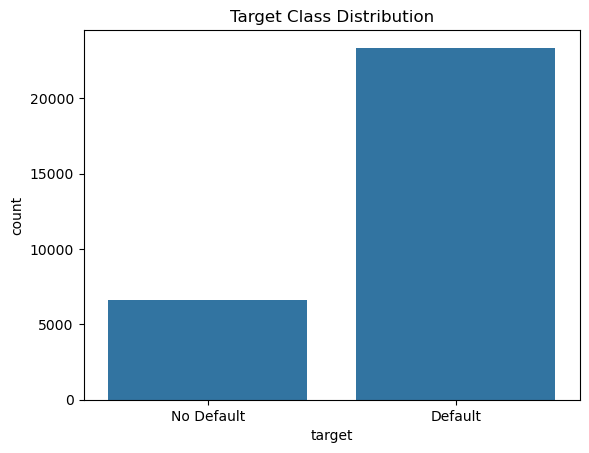

target
NO     77.88
YES    22.12
Name: proportion, dtype: float64


In [21]:
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

# Default rate
print(df['target'].value_counts(normalize=True) * 100)


The dataset is imbalanced (~22% default).
~22.1% of clients defaulted on their credit card payment the next month.
**Imbalanced dataset** – important to consider resampling techniques (e.g., SMOTE or class weights) for modeling.




### b. Categorical Variables


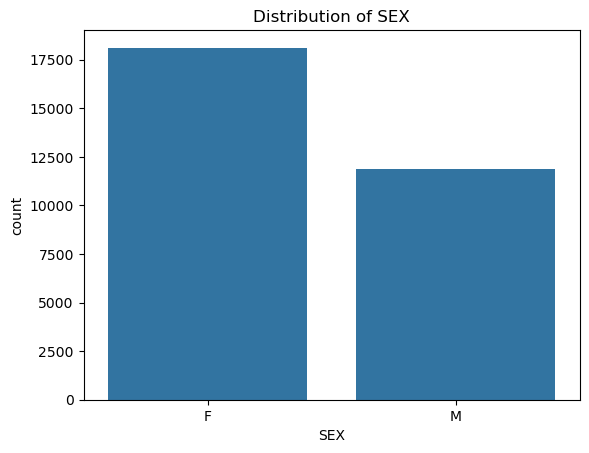

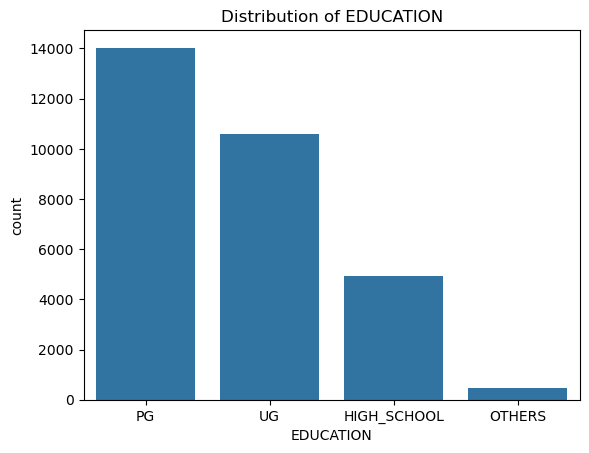

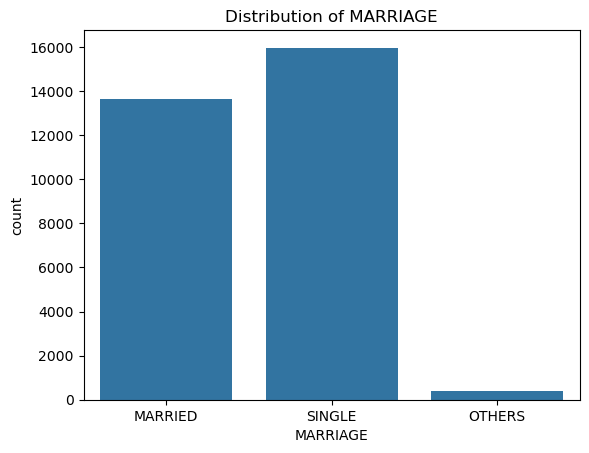

In [22]:
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
for var in cat_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.show()


### c. Numerical Variables


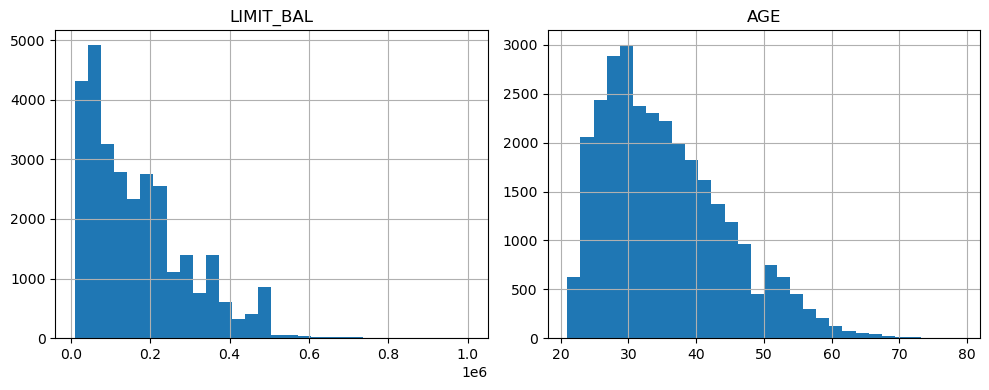

In [23]:
num_vars = ['LIMIT_BAL', 'AGE']
df[num_vars].hist(bins=30, figsize=(10, 4))
plt.tight_layout()
plt.show()


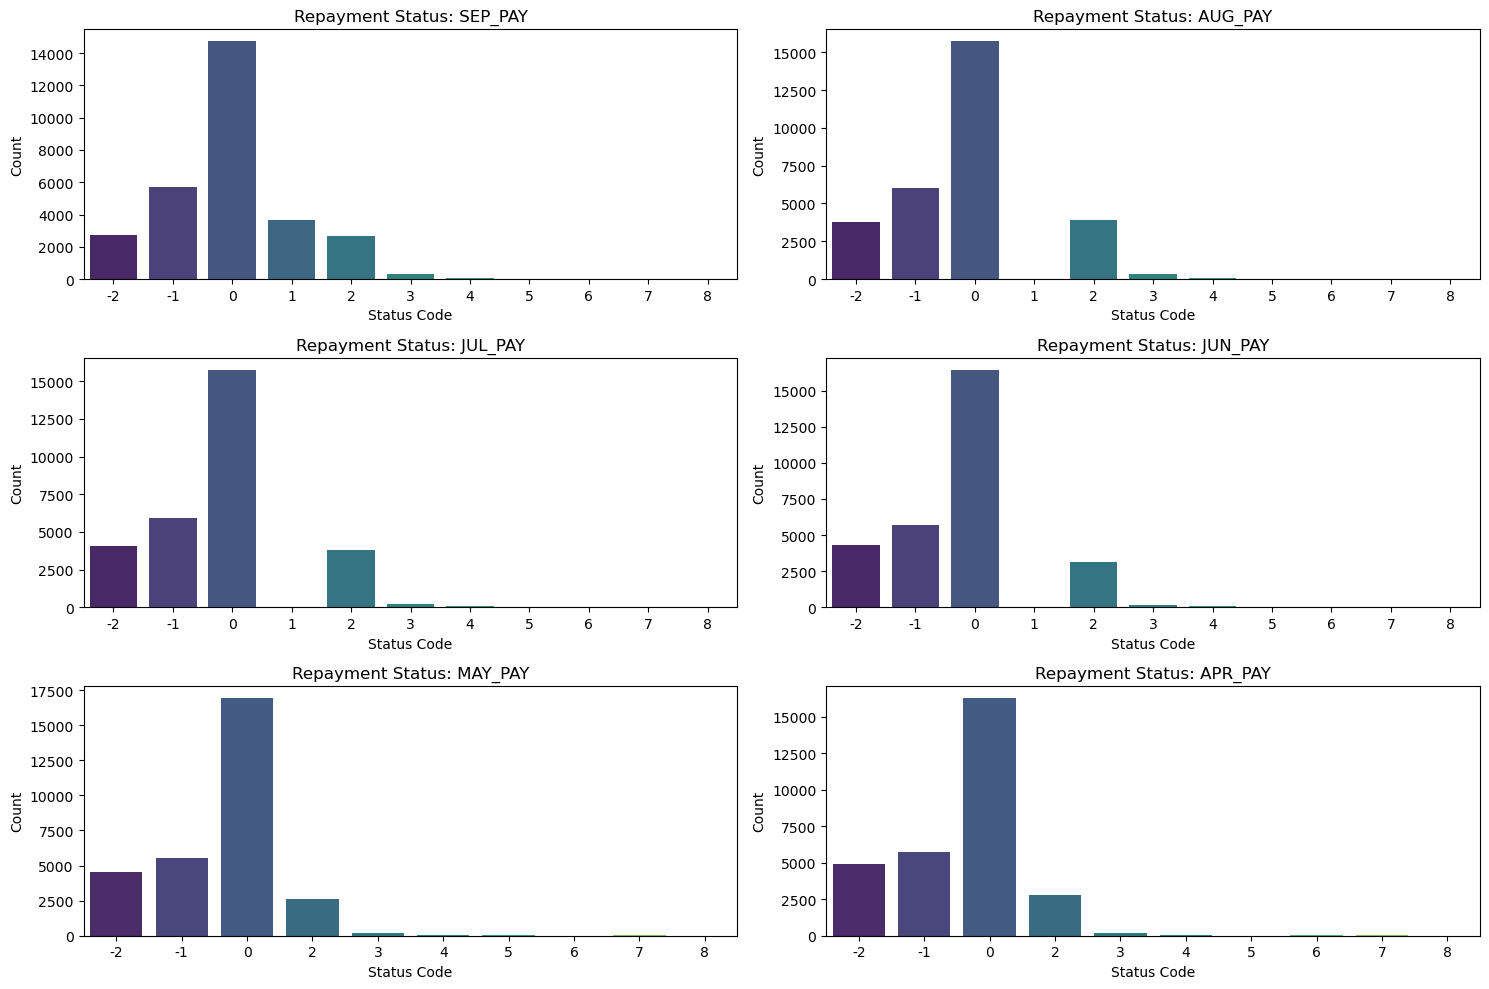

In [24]:
# Count Plot for status of  repayment 


repay_cols = ['SEP_PAY', 'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY']

plt.figure(figsize=(15, 10))

for i, col in enumerate(repay_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Repayment Status: {col}')
    plt.xlabel('Status Code')
    plt.ylabel('Count')
    plt.tight_layout()

### In Above Figure -1 = Fully paid 1- 9 means delayed for 1-9 respectevely -2 = no payment 0 = no due



## Bivariate Analysis (relationships with target)

### a. Target by Gender, Education, and Marital Status


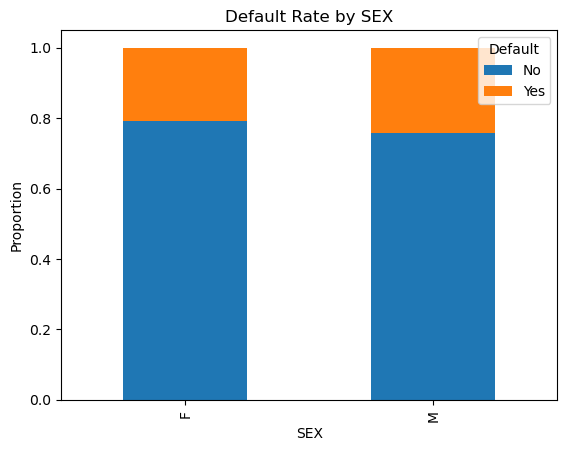

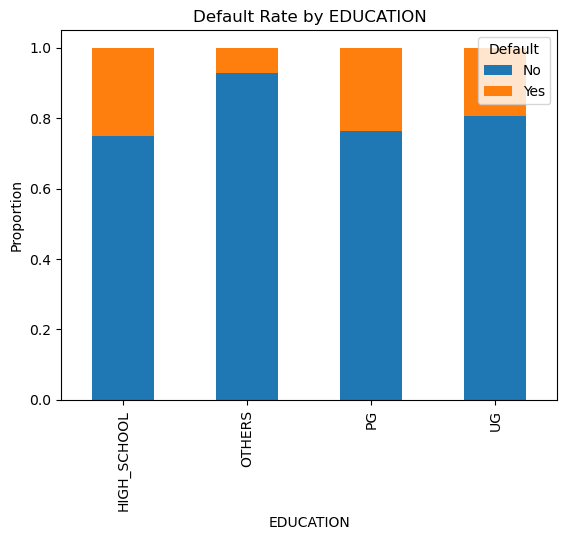

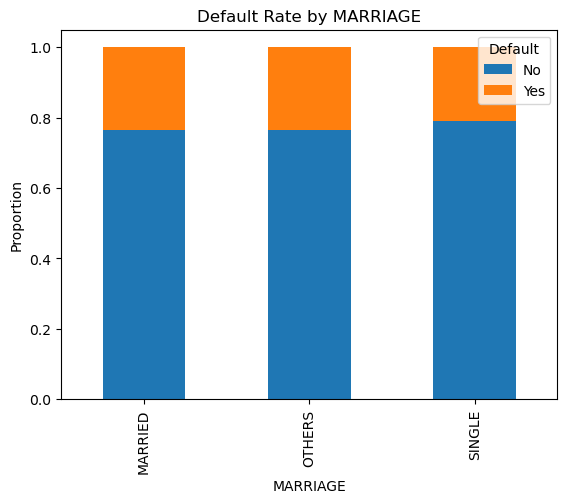

In [25]:
for var in cat_vars:
    pd.crosstab(df[var], df['target'], normalize='index').plot(kind='bar', stacked=True) #compute a cross-tabulation (contingency table) of two or more factors.
    plt.title(f'Default Rate by {var}')
    plt.ylabel('Proportion')
    plt.legend(title='Default', loc='upper right', labels=['No', 'Yes'])
    plt.show()


- There are more females credit card holder,so no. of defaulter have high proportion of females.F count= 18112
- No. of defaulters have a higher proportion of educated people (high school,UG,PG)
- No. of defaulters have a higher proportion of Singles. SINGLE-15964,MARRIED-13659,OTHERS-377



### b. Default by Age and Credit Limit



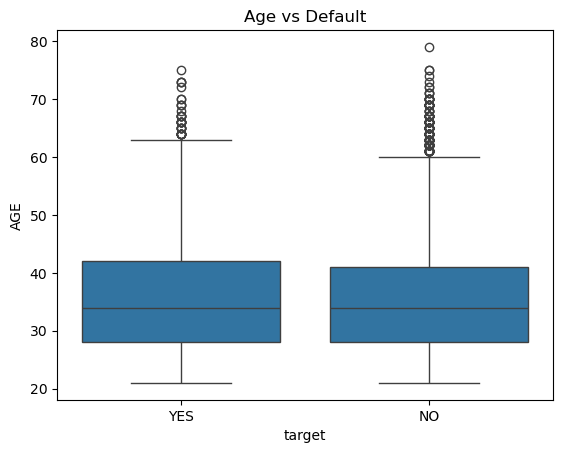

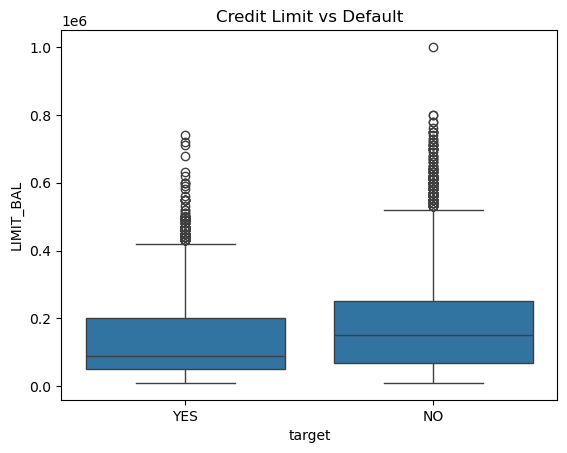

In [26]:
sns.boxplot(x='target', y='AGE', data=df)
plt.title('Age vs Default')
plt.show()

sns.boxplot(x='target', y='LIMIT_BAL', data=df)
plt.title('Credit Limit vs Default')
plt.show()


<Axes: xlabel='AGE', ylabel='count'>

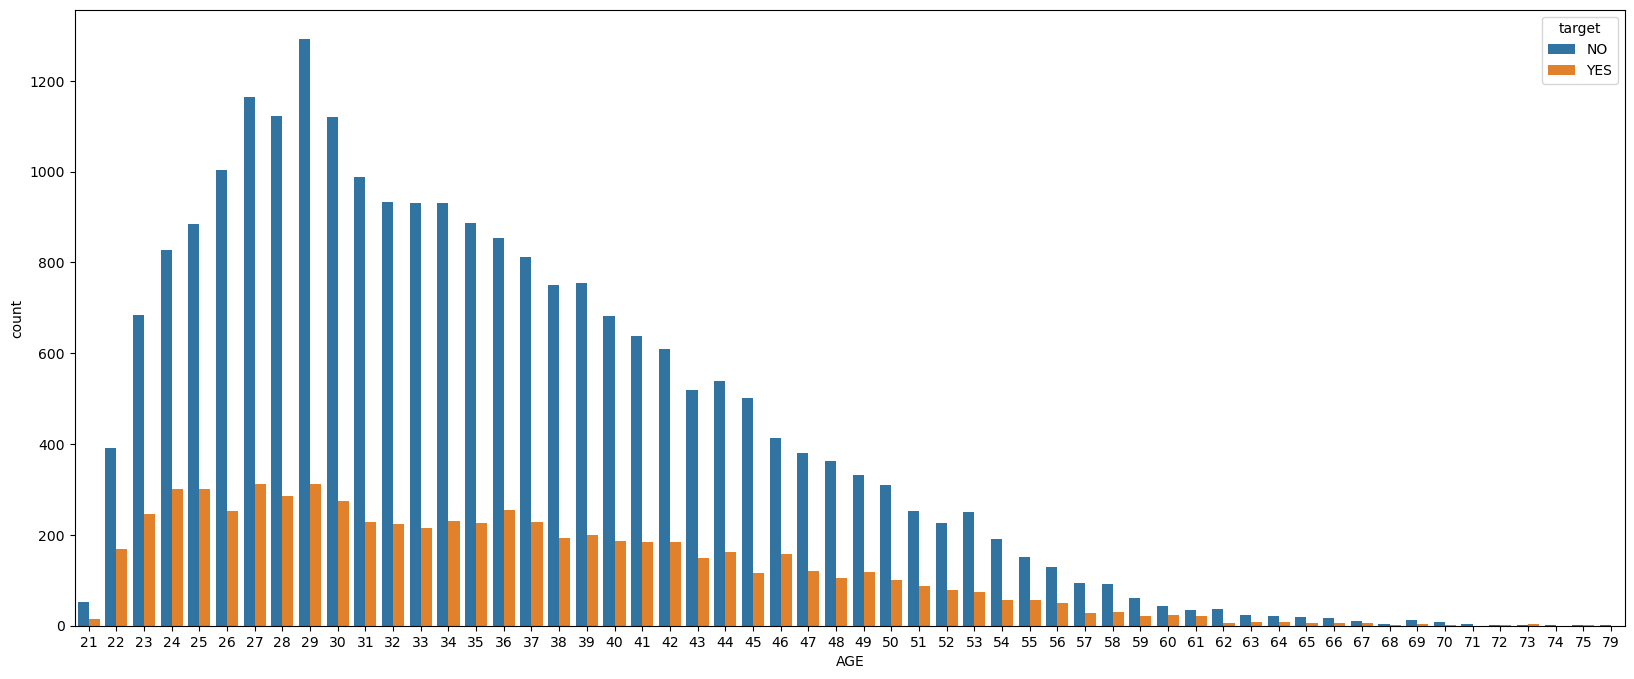

In [27]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'target', data = df)

### Bill and Payment Ananlysis



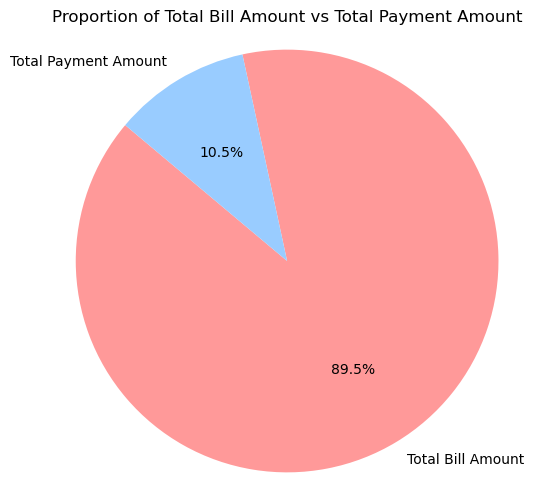

In [28]:
# Define the column lists
bill_columns = ['SEP_BILL', 'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL']
pay_columns  = ['SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT']

# Total bill and payment amount across all customers and months
total_bill = df[bill_columns].sum().sum()
total_payment = df[pay_columns].sum().sum()

# Pie chart
labels = ['Total Bill Amount', 'Total Payment Amount']
sizes = [total_bill, total_payment]
colors = ['#FF9999', '#99CCFF']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Bill Amount vs Total Payment Amount')
plt.axis('equal')
plt.show()

The pie chart clearly indicates that the total billed amount far exceeds the total payment amount, suggesting that many clients are not paying their full dues, potentially leading to higher chances of default.

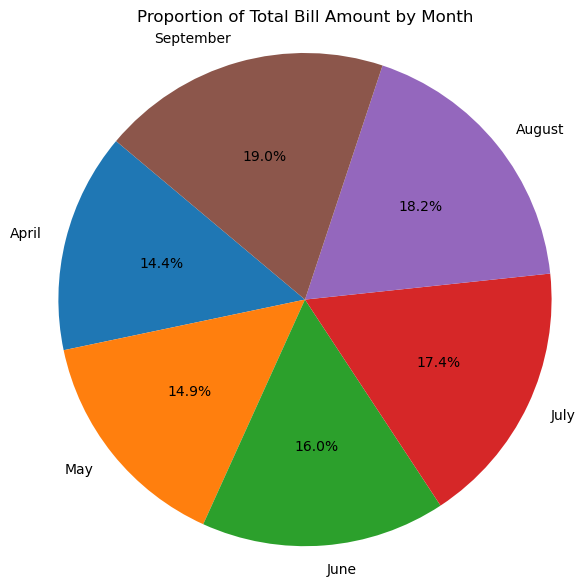

In [29]:
# List of bill‐amount columns in chronological order
bill_columns = ['APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL', 'SEP_BILL']
labels       = ['April', 'May', 'June', 'July', 'August', 'September']

# Compute total billed amount per month
sizes = [df[col].sum() for col in bill_columns]

# Plot
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Bill Amount by Month')
plt.axis('equal')      # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


Highest amount of bill was from september followed by august and july


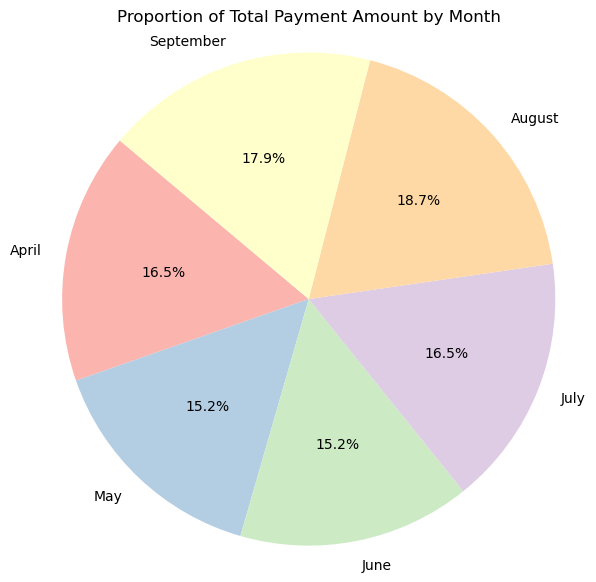

In [30]:
# List of payment columns in chronological order
pay_columns = ['APR_PAYMENT', 'MAY_PAYMENT', 'JUN_PAYMENT', 'JUL_PAYMENT', 'AUG_PAYMENT', 'SEP_PAYMENT']
labels      = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate total payment per month
sizes = [df[col].sum() for col in pay_columns]

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Proportion of Total Payment Amount by Month')
plt.axis('equal')
plt.show()

## Exploratory Data Analysis (EDA) – Key Inferences
# a. Demographics

Majority of clients are young adults (25–40 years), with numbers gradually declining as age increases.

Gender distribution: More female clients than male.

Marital status & education: Predominantly married and university-educated individuals.

# b. Payment Behavior

Repayment status (PAY_0 to PAY_6, renamed):

Negative values → timely payments

Positive values → delayed payments

A few extreme defaulters recorded values >5.

Clients who defaulted generally had higher positive repayment status values, indicating more frequent delays.

# c. Bill & Payment Amounts

Bill trends: Slight decrease over the months, possibly due to reduced usage or improved repayment.

Payment patterns: Payments are consistently lower than bill amounts, especially among defaulters.

Pie chart insights:

Highest total bill amounts occurred in September.

Payment amounts are more evenly distributed across months, though April/May show slightly lower proportions.

In [31]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEP_PAY',
       'AUG_PAY', 'JUL_PAY', 'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL',
       'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'target'],
      dtype='object')

In [32]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000,F,PG,MARRIED,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,YES
1,2,120000,F,PG,SINGLE,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,YES
2,3,90000,F,PG,SINGLE,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,NO
3,4,50000,F,PG,MARRIED,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,NO
4,5,50000,M,PG,MARRIED,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,HIGH_SCHOOL,MARRIED,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,NO
29996,29997,150000,M,HIGH_SCHOOL,SINGLE,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,NO
29997,29998,30000,M,PG,SINGLE,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,YES
29998,29999,80000,M,HIGH_SCHOOL,MARRIED,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,YES


# DETECTING OUTLIER USING BOX PLOT

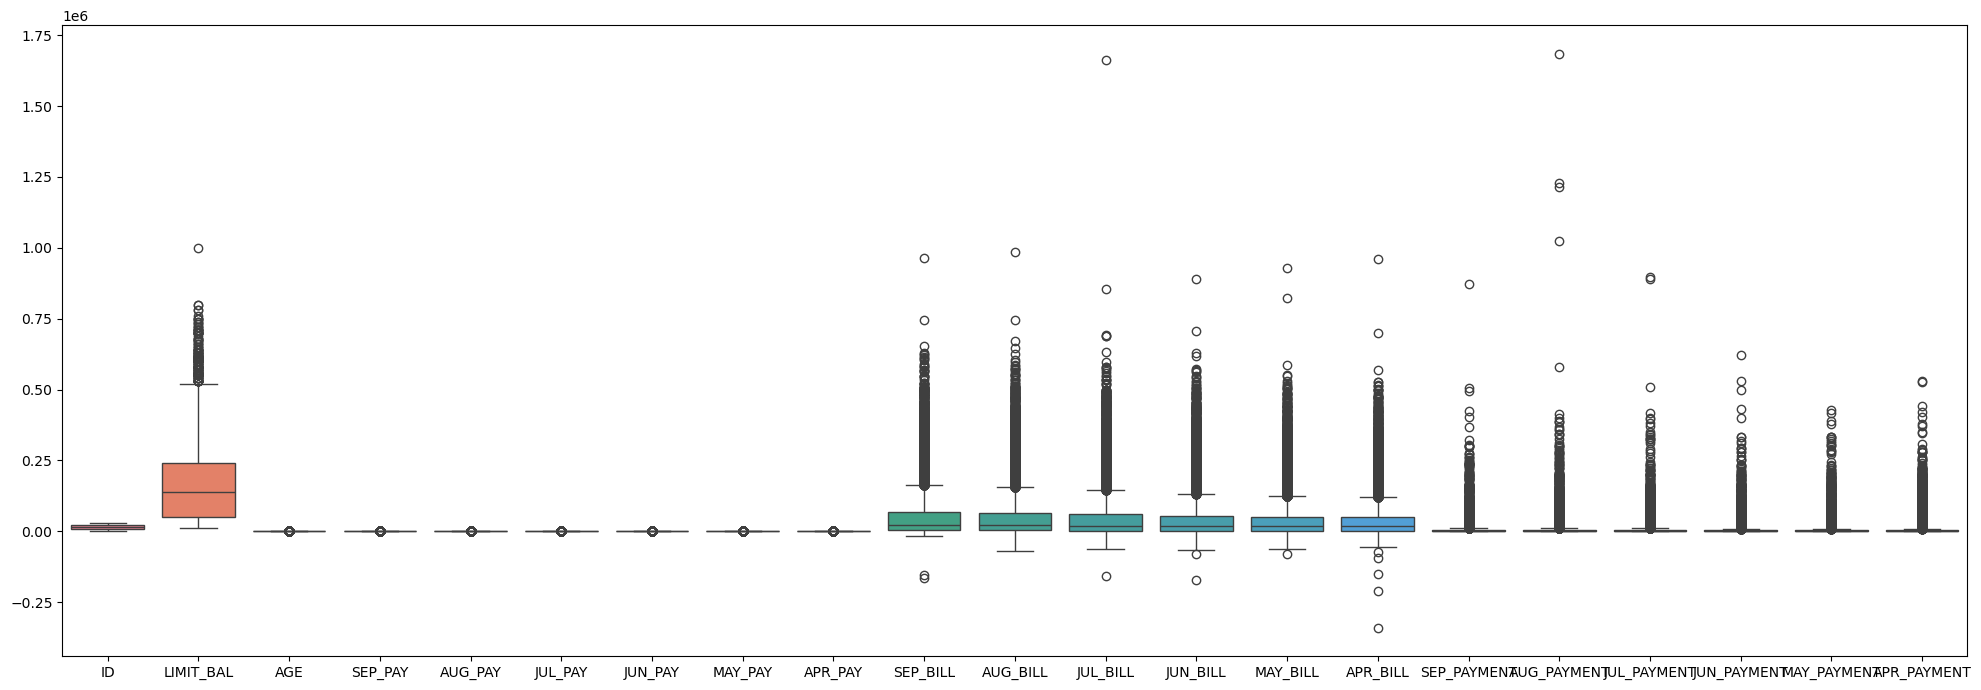

In [33]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()

In [34]:
df['target'].value_counts()

target
NO     23364
YES     6636
Name: count, dtype: int64

YES → The customer failed to make the minimum required payment next month (i.e., defaulter).

NO → The customer paid as expected (i.e., non-defaulter).

## Handling Outliers

### Caping/Imputing outlier data point using IQR

In [35]:
 # Function to apply IQR method to fix outliers
def fix_outliers_iqr(df):
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df


In [36]:
df1=fix_outliers_iqr(df)
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,YES
1,2,120000.0,F,PG,SINGLE,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,YES
2,3,90000.0,F,PG,SINGLE,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,NO
3,4,50000.0,F,PG,MARRIED,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,NO
4,5,50000.0,M,PG,MARRIED,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,NO
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,NO
29997,29998,30000.0,M,PG,SINGLE,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,YES
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,YES


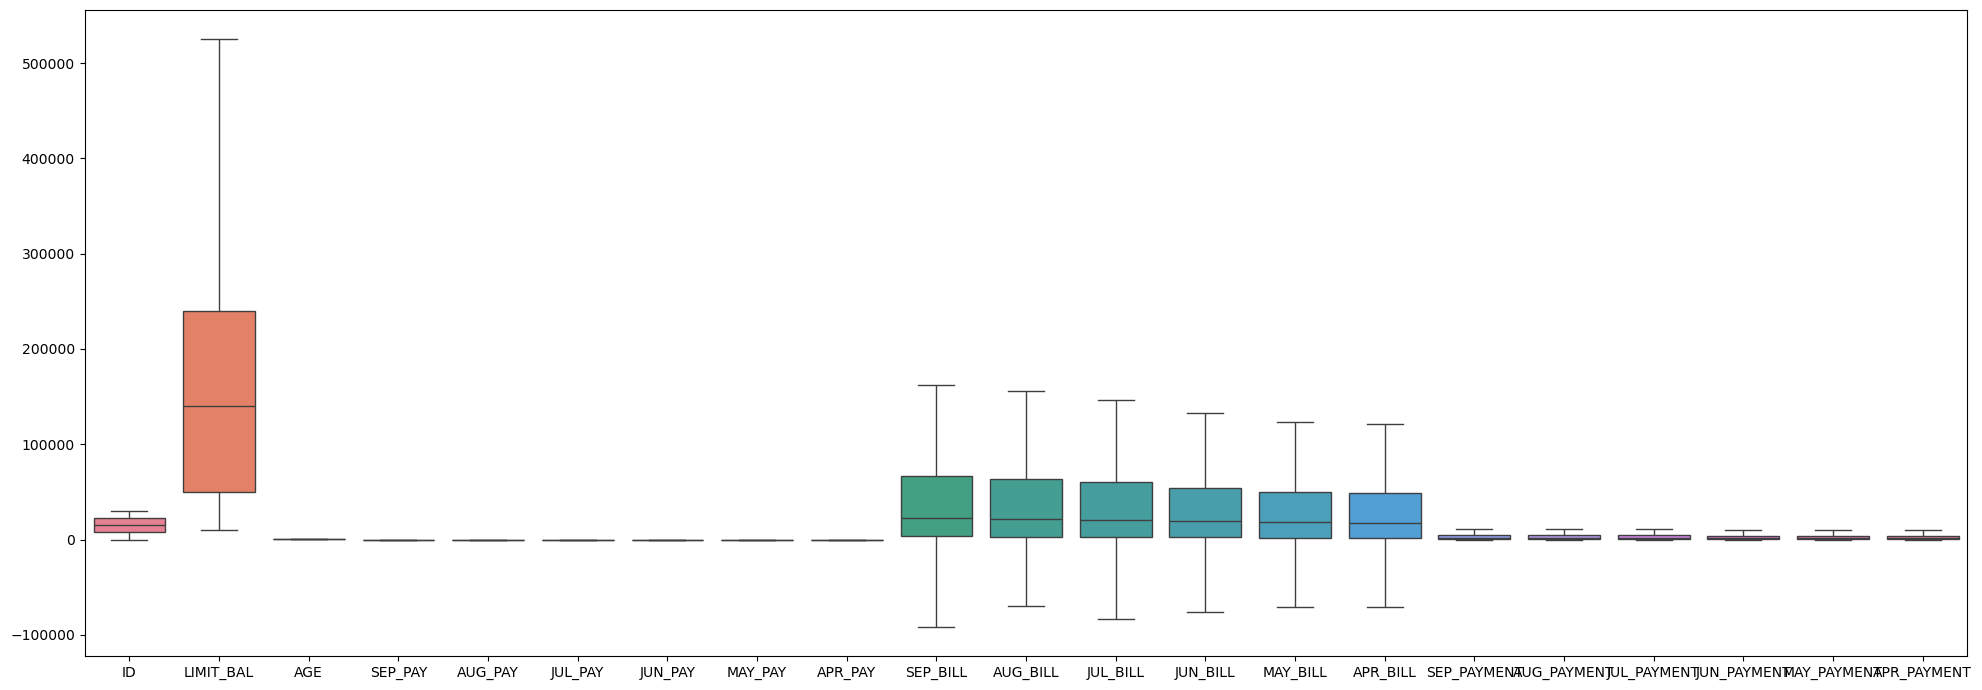

In [37]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df1)
plt.tight_layout()
plt.show()

## CORRELATION ANALYSIS OF ALL NUMERICAL COLUMN WITH PLOTTING HEATMAP

In [38]:
df1['target_num'] = df1['target'].map({'NO': 0, 'YES': 1})


In [39]:
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target,target_num
0,1,20000.0,F,PG,MARRIED,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,YES,1
1,2,120000.0,F,PG,SINGLE,26.0,-1.0,1.5,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,YES,1
2,3,90000.0,F,PG,SINGLE,34.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,NO,0
3,4,50000.0,F,PG,MARRIED,37.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,NO,0
4,5,50000.0,M,PG,MARRIED,57.0,-1.0,0.0,-1.0,0.0,...,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39.0,0.0,0.0,0.0,0.0,...,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,NO,0
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,NO,0
29997,29998,30000.0,M,PG,SINGLE,37.0,1.5,1.5,1.5,-1.0,...,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,YES,1
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41.0,1.0,-1.0,0.0,0.0,...,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,YES,1


In [40]:
co = df1.corr(numeric_only=True)
co

,ID,LIMIT_BAL,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target_num
ID,1.000000,0.026428,0.019147,-0.032481,-0.010198,-0.014786,-0.003767,-0.022187,-0.017826,0.017410,...,0.040608,0.015959,0.018622,0.010365,0.041859,0.078819,0.016662,0.012433,0.029365,-0.013952
LIMIT_BAL,0.026428,1.000000,0.144929,-0.281256,-0.308840,-0.296653,-0.275536,-0.254271,-0.237806,0.198285,...,0.209352,0.211746,0.207354,0.343157,0.353506,0.358593,0.349563,0.354400,0.371924,-0.154380
AGE,0.019147,0.144929,1.000000,-0.047814,-0.059234,-0.060760,-0.058576,-0.062664,-0.055502,0.038029,...,0.029304,0.026337,0.024887,0.038060,0.047249,0.039551,0.044055,0.040017,0.034892,0.013687
SEP_PAY,-0.032481,-0.281256,-0.047814,1.000000,0.645076,0.559973,0.528837,0.503439,0.476768,0.251773,...,0.241646,0.239012,0.234894,-0.102186,-0.095138,-0.087057,-0.067292,-0.061694,-0.076801,0.291685
AUG_PAY,-0.010198,-0.308840,-0.059234,0.645076,1.000000,0.786833,0.694651,0.658172,0.615124,0.345197,...,0.325990,0.320417,0.315323,-0.044281,-0.010027,-0.011084,0.002347,0.009338,-0.003035,0.235276
JUL_PAY,-0.014786,-0.296653,-0.060760,0.559973,0.786833,1.000000,0.792073,0.705038,0.653343,0.319670,...,0.343079,0.335284,0.327733,0.114352,-0.040379,0.000133,0.021869,0.028235,0.009207,0.208608
JUN_PAY,-0.003767,-0.275536,-0.058576,0.528837,0.694651,0.792073,1.000000,0.820382,0.719471,0.319552,...,0.379892,0.370541,0.360876,0.087344,0.126888,-0.016672,0.037965,0.055232,0.040393,0.186960
MAY_PAY,-0.022187,-0.254271,-0.062664,0.503439,0.658172,0.705038,0.820382,1.000000,0.818823,0.318971,...,0.414625,0.406531,0.391663,0.084345,0.107406,0.134246,0.022686,0.070511,0.063572,0.172703
APR_PAY,-0.017826,-0.237806,-0.055502,0.476768,0.615124,0.653343,0.719471,0.818823,1.000000,0.316668,...,0.401270,0.433413,0.419766,0.088892,0.091165,0.113354,0.156453,0.045744,0.078345,0.156596
SEP_BILL,0.017410,0.198285,0.038029,0.251773,0.345197,0.319670,0.319552,0.318971,0.316668,1.000000,...,0.852575,0.819291,0.793632,0.466516,0.424701,0.392170,0.403331,0.394699,0.379730,-0.029033


In [41]:
co['target_num'].sort_values(ascending=False)


target_num     1.000000
SEP_PAY        0.291685
AUG_PAY        0.235276
JUL_PAY        0.208608
JUN_PAY        0.186960
MAY_PAY        0.172703
APR_PAY        0.156596
AGE            0.013687
APR_BILL      -0.008845
MAY_BILL      -0.013471
ID            -0.013952
JUN_BILL      -0.016444
JUL_BILL      -0.020959
AUG_BILL      -0.022782
SEP_BILL      -0.029033
MAY_PAYMENT   -0.108081
JUN_PAYMENT   -0.113716
APR_PAYMENT   -0.114552
JUL_PAYMENT   -0.124561
AUG_PAYMENT   -0.139699
SEP_PAYMENT   -0.143442
LIMIT_BAL     -0.154380
Name: target_num, dtype: float64

Feature Importance Insights

🔹 Top Predictors of Default (High Positive Correlation)

SEP_PAY, AUG_PAY, JUL_PAY — repayment delay codes indicating overdue payments.

🟢 Top Protective Features (High Negative Correlation)

LIMIT_BAL — higher credit limit associated with lower default risk.

SEP_PAYMENT, AUG_PAYMENT — higher recent payments linked to reduced default likelihood.

⚪ Weak or Negligible Features

AGE, BILL_AMT_X — show little to no predictive value for default classification.

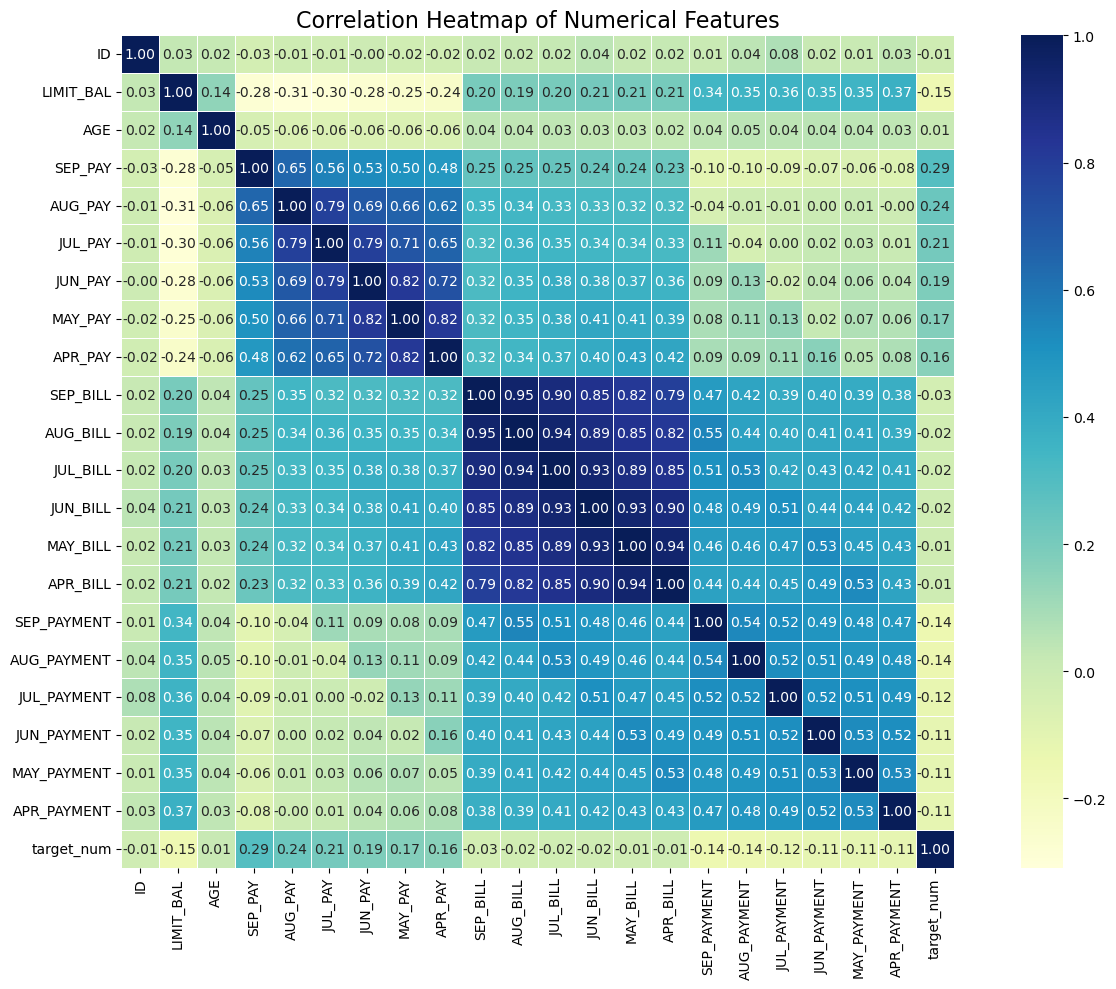

In [42]:
plt.figure(figsize=(14, 10))
sns.heatmap(co, 
            annot=True, 
            fmt=".2f", 
            cmap='YlGnBu', 
            linewidths=0.5, 
            cbar=True,
            square=True)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


## SKEWNESS 

In [43]:
df1= df1.select_dtypes(include='number')
df1

,ID,LIMIT_BAL,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target_num
0,1,20000.0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,3913.000,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,2682.000,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.000,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.000,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.000,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,162389.375,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.000,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,3565.000,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1
29998,29999,80000.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.000,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1


In [44]:
df1.skew()

ID             0.000000
LIMIT_BAL      0.904504
AGE            0.654467
SEP_PAY       -0.224566
AUG_PAY       -0.015287
JUL_PAY       -0.024423
JUN_PAY       -0.075685
MAY_PAY       -0.128769
APR_PAY       -0.080431
SEP_BILL       1.194178
AUG_BILL       1.189649
JUL_BILL       1.184730
JUN_BILL       1.183997
MAY_BILL       1.184657
APR_BILL       1.199718
SEP_PAYMENT    1.032414
AUG_PAYMENT    1.113399
JUL_PAYMENT    1.200528
JUN_PAYMENT    1.176348
MAY_PAYMENT    1.183906
APR_PAYMENT    1.211015
target_num     1.343504
dtype: float64

📊 Skewness Analysis & Recommendations
🔍 Insights

📈 Bill & Payment Amounts: Strong right skew (>1) — a few customers have very high bills/payments, while most have much lower values.

📊 Age & Credit Limit: Mild skewness.

⚖️ Repayment Status (PAY_x): Fairly symmetric distribution.

## 💡 What to Do

| 📌 Observation | ✅ Recommended Action |
|----------------|----------------------|
| Bill & payment columns are heavily right-skewed | Apply log transformation to normalize values |
| Age and credit limit show mild skew | Keep as-is for tree models; transform for linear models |
| PAY_x columns are fairly symmetric | No transformation needed |
| Skewed features can harm model performance | Especially true for logistic regression or KNN |


In [45]:
df.drop('target_num',axis=1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target
0,1,20000.0,F,PG,MARRIED,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,YES
1,2,120000.0,F,PG,SINGLE,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,YES
2,3,90000.0,F,PG,SINGLE,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,NO
3,4,50000.0,F,PG,MARRIED,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,NO
4,5,50000.0,M,PG,MARRIED,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,M,HIGH_SCHOOL,MARRIED,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,NO
29996,29997,150000.0,M,HIGH_SCHOOL,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,NO
29997,29998,30000.0,M,PG,SINGLE,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,YES
29998,29999,80000.0,M,HIGH_SCHOOL,MARRIED,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,YES


## SKEWNESS USING POWER TRANSFORMER FROM SKLEARN

In [46]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [47]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df1[numeric_cols]),
    columns=numeric_cols
)

In [48]:
df_transformed.skew()

ID            -0.291081
LIMIT_BAL     -0.080029
AGE            0.033520
SEP_PAY       -0.012942
AUG_PAY        0.003610
JUL_PAY        0.011113
JUN_PAY        0.026121
MAY_PAY        0.041061
APR_PAY        0.041781
SEP_BILL      -2.186410
AUG_BILL      -1.409826
JUL_BILL      -1.711258
JUN_BILL      -1.450557
MAY_BILL      -1.351760
APR_BILL      -1.084529
SEP_PAYMENT   -0.486386
AUG_PAYMENT   -0.467856
JUL_PAYMENT   -0.430287
JUN_PAYMENT   -0.414227
MAY_PAYMENT   -0.422004
APR_PAYMENT   -0.417807
target_num     1.343504
dtype: float64

# Transformation Impact

The transformation successfully reduced the right-skewness of many variables, bringing their distributions closer to normal.

However, the bill amount features have now become overly left-skewed.

➡️ This is generally not an issue for tree-based models such as Random Forest or XGBoost, which are insensitive to monotonic transformations of the input features.

## Plotting Histplot 

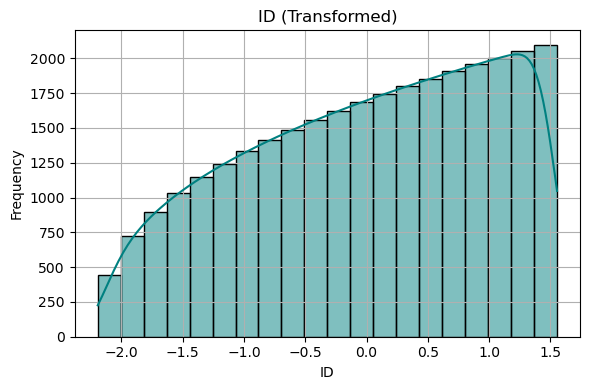

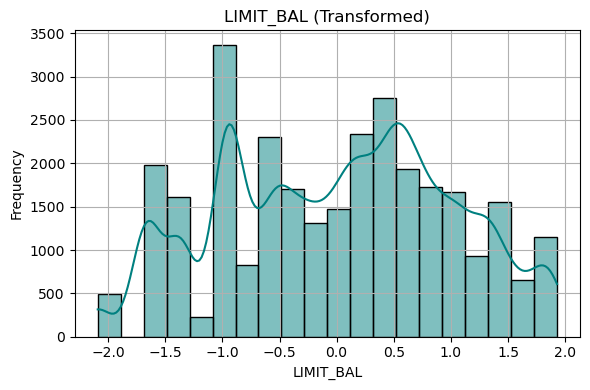

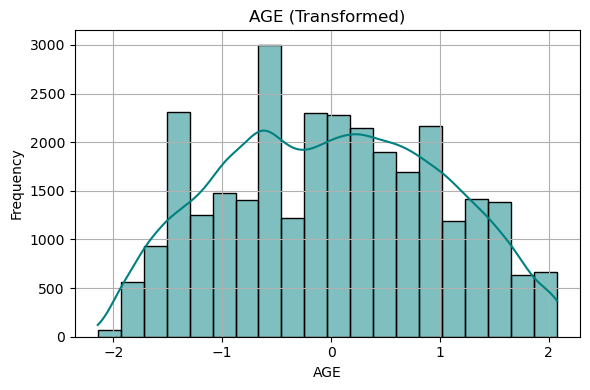

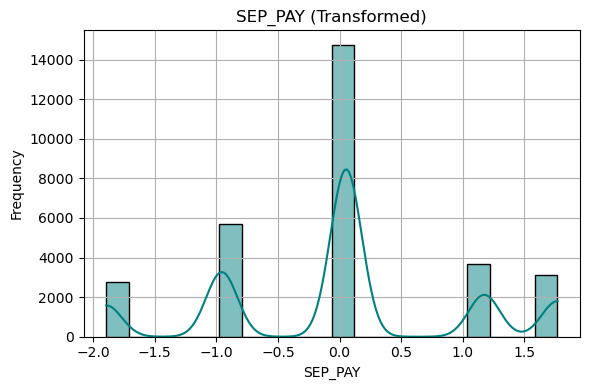

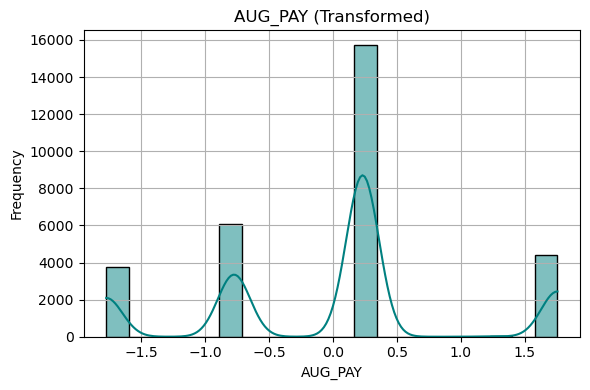

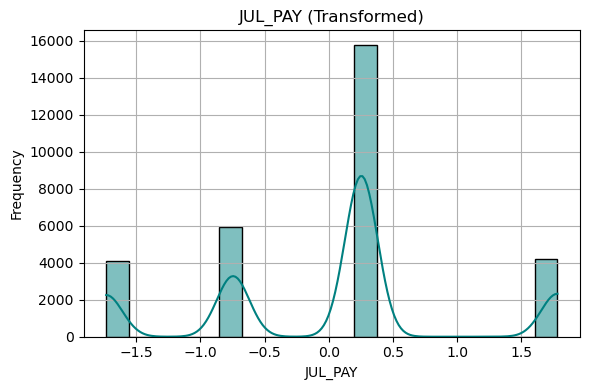

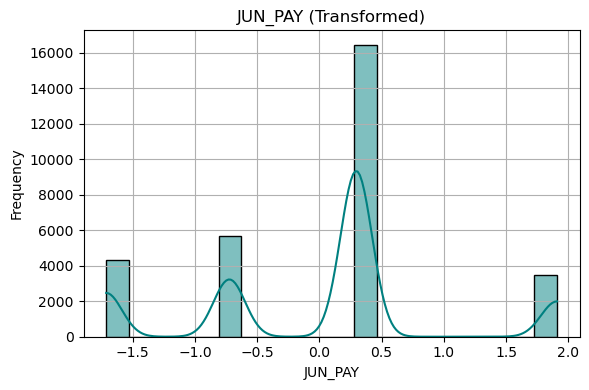

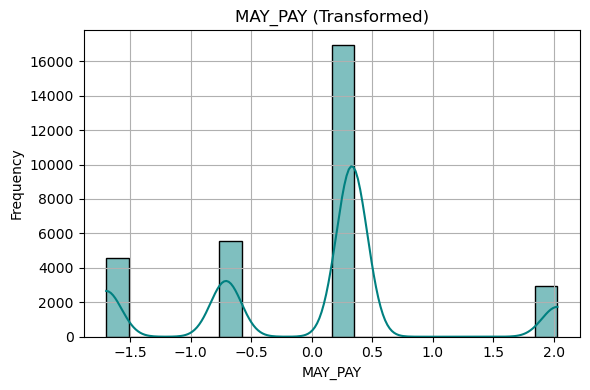

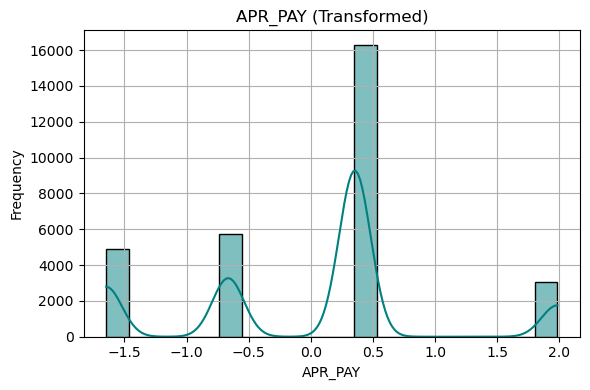

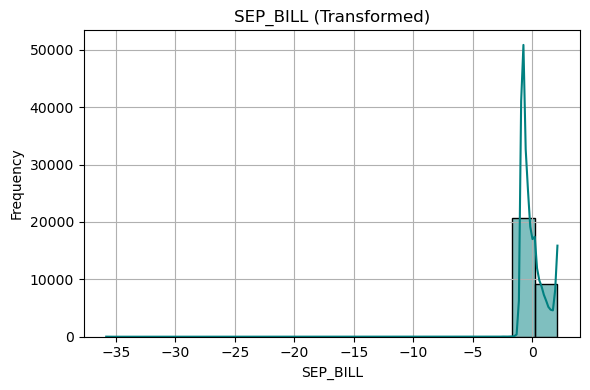

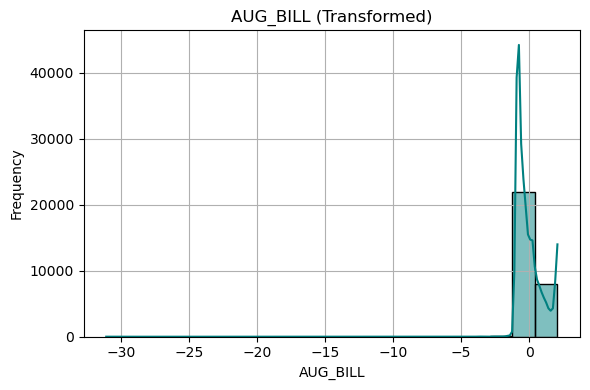

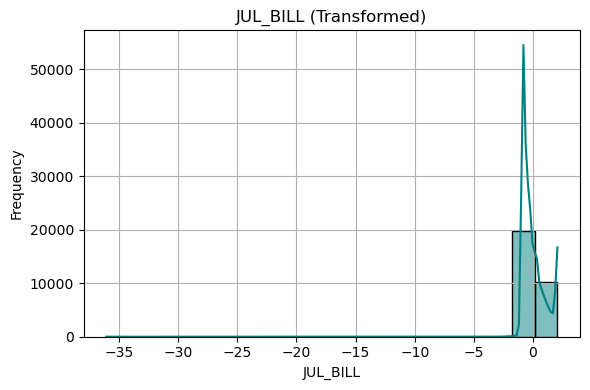

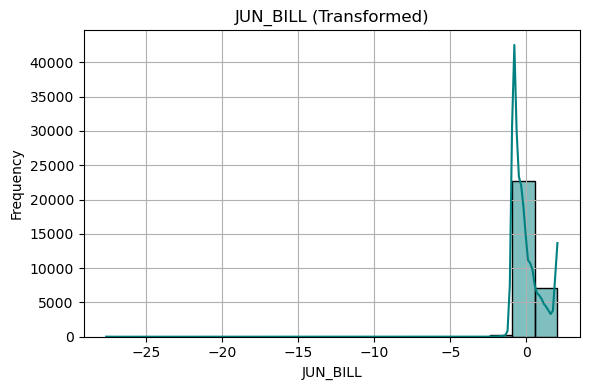

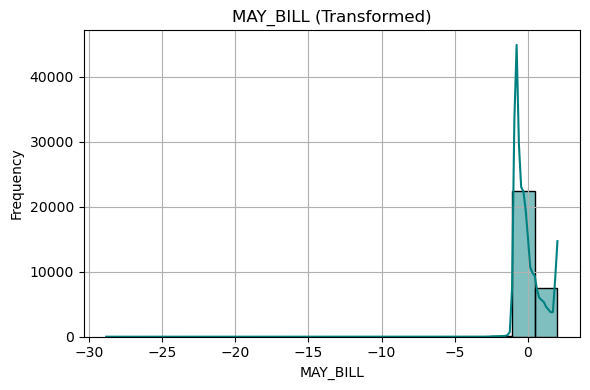

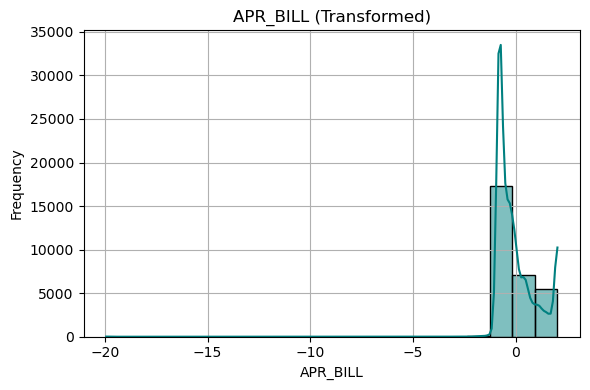

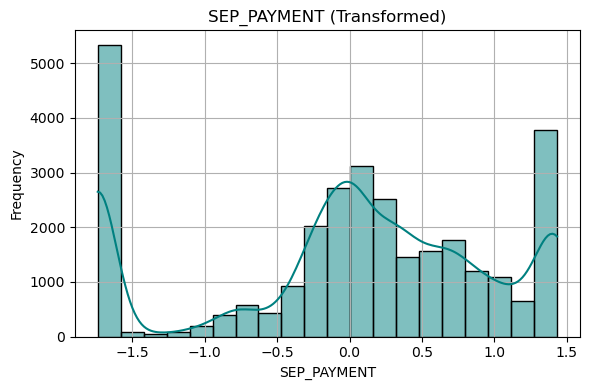

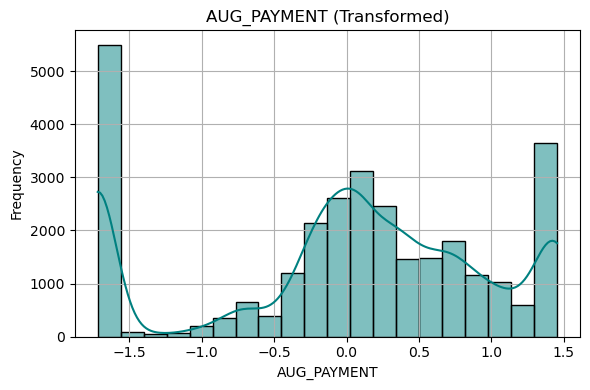

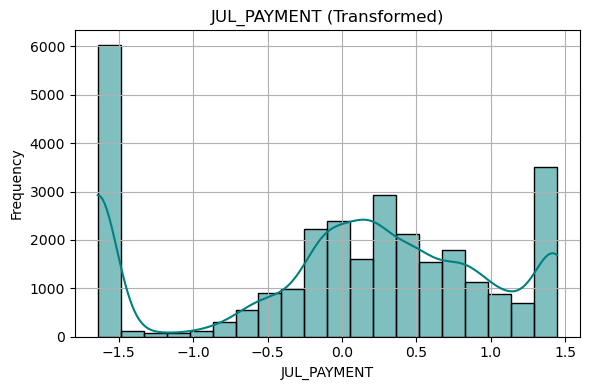

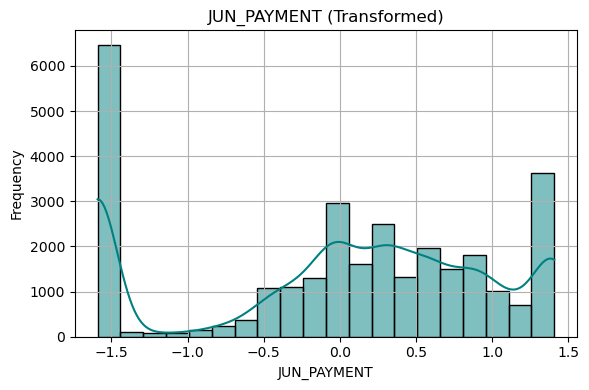

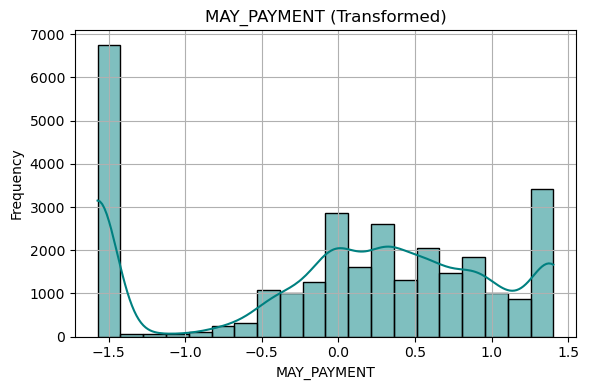

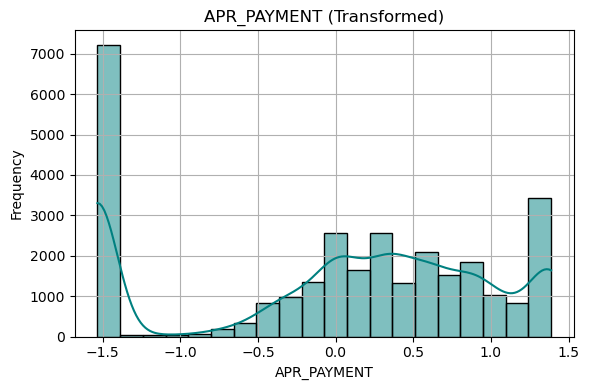

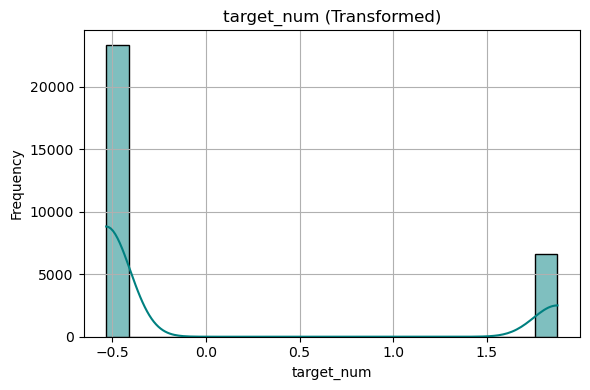

In [49]:
# Plot each column individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [50]:
df_transformed

,ID,LIMIT_BAL,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUN_BILL,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target_num
0,-2.192698,-1.663086,-1.502650,1.768599,1.754474,-0.745790,-0.724317,-1.698568,-1.647202,-0.778886,...,-0.870146,-0.856743,-0.820634,-1.738759,-0.481385,-1.641499,-1.590463,-1.571889,-1.533546,1.876378
1,-2.191315,-0.092733,-1.134901,-0.955095,1.754474,0.254091,0.296104,0.331506,1.985387,-0.812835,...,-0.753012,-0.725488,-0.703165,-1.738759,-0.308669,-0.149689,-0.040647,-1.571889,0.354978,1.876378
2,-2.190062,-0.399782,0.012478,0.053393,0.230658,0.254091,0.296104,0.331506,0.354154,-0.212111,...,-0.447799,-0.390719,-0.353813,-0.131513,-0.096773,-0.149689,-0.040647,-0.029434,0.901868,-0.532942
3,-2.188899,-0.956424,0.348126,0.053393,0.230658,0.254091,0.296104,0.331506,0.354154,0.134601,...,-0.107373,-0.031080,0.002364,0.031677,0.076155,-0.060084,0.005145,0.002048,0.013257,-0.532942
4,-2.187802,-0.956424,1.885161,-0.955095,0.230658,-0.745790,0.296104,0.331506,0.354154,-0.660035,...,-0.283127,-0.279470,-0.260010,0.031677,1.453542,1.386858,1.355422,-0.195857,-0.154552,-0.532942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.553656,0.639499,0.551069,0.053393,0.230658,0.254091,0.296104,0.331506,0.354154,2.103877,...,1.171211,0.024801,-0.342402,1.167869,1.453542,0.819655,0.570555,0.897631,0.013257,-0.532942
29996,1.553744,0.162743,0.915552,-0.955095,-0.774943,-0.745790,-0.724317,0.331506,0.354154,-0.842052,...,-0.588708,-0.670100,-0.820634,-0.020171,0.446466,1.293311,-0.797932,-1.571889,-1.533546,-0.532942
29997,1.553833,-1.372221,0.348126,1.768599,1.754474,1.782936,-0.724317,0.331506,0.354154,-0.788306,...,-0.284636,-0.242208,-0.254164,-1.738759,-1.717726,1.446310,0.781106,0.324703,0.601810,1.876378
29998,1.553921,-0.518649,0.739669,1.174678,-0.774943,0.254091,0.296104,0.331506,-0.665105,-1.256182,...,0.439458,-0.475391,0.464586,1.432639,0.422207,-0.069382,0.297852,1.401737,0.300513,1.876378


## Feature Engineering

### Encoding Target Variable using LabelEncoder from Sklearn.preprocessing

In [51]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['target']=le.fit_transform(df[['target']])
df['SEX']=le.fit_transform(df[['SEX']])
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,...,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target,target_num
0,1,20000.0,0,PG,MARRIED,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,0,PG,SINGLE,26.0,-1.0,1.5,0.0,0.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,0,PG,SINGLE,34.0,0.0,0.0,0.0,0.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,0,PG,MARRIED,37.0,0.0,0.0,0.0,0.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,PG,MARRIED,57.0,-1.0,0.0,-1.0,0.0,...,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,HIGH_SCHOOL,MARRIED,39.0,0.0,0.0,0.0,0.0,...,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0,0
29996,29997,150000.0,1,HIGH_SCHOOL,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0
29997,29998,30000.0,1,PG,SINGLE,37.0,1.5,1.5,1.5,-1.0,...,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,1,1
29998,29999,80000.0,1,HIGH_SCHOOL,MARRIED,41.0,1.0,-1.0,0.0,0.0,...,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,1,1


## Encoding using One hot Encoder from sklearn.preprocessing

In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,drop=None)
edu = ohe.fit_transform(df[['EDUCATION']])
cols= ohe.get_feature_names_out(['EDUCATION'])
df_encoded=pd.DataFrame(edu,columns=cols)
df_encoded

,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
29995,1.0,0.0,0.0,0.0
29996,1.0,0.0,0.0,0.0
29997,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0


In [53]:
merge=pd.concat([df.drop('EDUCATION',axis=1), df_encoded],axis=1)
merge= pd.DataFrame(merge)
merge

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,...,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,target,target_num,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG
0,1,20000.0,0,MARRIED,24.0,1.5,1.5,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,1,1,0.0,0.0,1.0,0.0
1,2,120000.0,0,SINGLE,26.0,-1.0,1.5,0.0,0.0,0.0,...,1000.0,1000.0,0.0,2000.0,1,1,0.0,0.0,1.0,0.0
2,3,90000.0,0,SINGLE,34.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,1000.0,5000.0,0,0,0.0,0.0,1.0,0.0
3,4,50000.0,0,MARRIED,37.0,0.0,0.0,0.0,0.0,0.0,...,1200.0,1100.0,1069.0,1000.0,0,0,0.0,0.0,1.0,0.0
4,5,50000.0,1,MARRIED,57.0,-1.0,0.0,-1.0,0.0,0.0,...,10000.0,9000.0,689.0,679.0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,MARRIED,39.0,0.0,0.0,0.0,0.0,0.0,...,5003.0,3047.0,5000.0,1000.0,0,0,1.0,0.0,0.0,0.0
29996,29997,150000.0,1,SINGLE,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8998.0,129.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0
29997,29998,30000.0,1,SINGLE,37.0,1.5,1.5,1.5,-1.0,0.0,...,10677.5,4200.0,2000.0,3100.0,1,1,0.0,0.0,1.0,0.0
29998,29999,80000.0,1,MARRIED,41.0,1.0,-1.0,0.0,0.0,0.0,...,1178.0,1926.0,9700.0,1804.0,1,1,1.0,0.0,0.0,0.0


In [54]:
marriage = ohe.fit_transform(merge[['MARRIAGE']])
cols= ohe.get_feature_names_out(['MARRIAGE'])
df_encode=pd.DataFrame(marriage,columns=cols)
df_encode

,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
29995,1.0,0.0,0.0
29996,0.0,0.0,1.0
29997,0.0,0.0,1.0
29998,1.0,0.0,0.0


In [55]:
df1=pd.concat([merge.drop('MARRIAGE',axis=1), df_encode],axis=1)
df1

,ID,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,APR_PAYMENT,target,target_num,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1,20000.0,0,24.0,1.5,1.5,-1.0,-1.0,-2.0,-2.0,...,0.0,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,120000.0,0,26.0,-1.0,1.5,0.0,0.0,0.0,1.5,...,2000.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3,90000.0,0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5000.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,50000.0,0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,50000.0,1,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,679.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,29997,150000.0,1,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29997,29998,30000.0,1,37.0,1.5,1.5,1.5,-1.0,0.0,0.0,...,3100.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29998,29999,80000.0,1,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,...,1804.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
print('Length of Encoded clean data frame',len(df1))

Length of Encoded clean data frame 30000


In [57]:
df1.shape

(30000, 31)


### **SMOTE (Synthetic Minority Over-sampling Technique)**  
SMOTE is a popular **oversampling method** used to address class imbalance in datasets. Instead of simply duplicating existing minority class samples, SMOTE **generates synthetic examples** by:  

1. Selecting a minority class sample at random.  
2. Finding its *k* nearest minority class neighbors.  
3. Creating new synthetic points along the line segments joining the sample and its neighbors.  

**Key benefits:**  
- Helps models learn decision boundaries more effectively for the minority class.  
- Reduces overfitting risk compared to simple duplication.  

**Caution:**  
- May introduce noise if applied without proper preprocessing.  
- Works best when combined with cross-validation and applied only to the training set.  


In [58]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()


In [59]:
x_smote, y_smote = smote.fit_resample(df1[(i for i in list(df1.describe(include='all').columns) if i != 'target')], df1['target'])


In [60]:
print('length of y smote',len(y_smote))

length of y smote 46728


In [61]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df1.describe(include='all').columns) if i != 'target'))

In [62]:
balanced_df

,ID,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,MAY_PAYMENT,APR_PAYMENT,target_num,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1,20000.0,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,1,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000
1,2,120000.0,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,1.500000,...,0.000000,2000.000000,1,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000
2,3,90000.0,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1000.000000,5000.000000,0,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000
3,4,50000.0,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1069.000000,1000.000000,0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000
4,5,50000.0,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,689.000000,679.000000,0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,27332,150000.0,0,28.480669,-1.149356,-1.000000,-1.000000,-1.149356,-1.149356,-1.149356,...,422.330544,1135.017407,1,0.0,0.0,0.000000,1.000000,0.149356,0.0,0.850644
46724,25420,30000.0,0,23.619527,1.035355,0.000000,0.464645,0.464645,0.464645,0.464645,...,1087.338911,414.141845,1,0.0,0.0,0.309764,0.690236,0.690236,0.0,0.309764
46725,13409,50000.0,0,24.619710,0.607391,0.607391,0.607391,0.607391,0.607391,0.607391,...,1437.517387,1309.465521,1,0.0,0.0,0.595073,0.404927,0.000000,0.0,1.000000
46726,2328,20000.0,0,28.918713,1.063929,1.238357,0.000000,0.261643,1.500000,1.500000,...,174.428437,0.000000,1,0.0,0.0,0.825572,0.174428,0.825572,0.0,0.174428


In [63]:
balanced_df['target'] = y_smote
balanced_df=balanced_df.drop('target_num',axis=1)
balanced_df

,ID,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,...,MAY_PAYMENT,APR_PAYMENT,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE,target
0,1,20000.0,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1
1,2,120000.0,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,1.500000,...,0.000000,2000.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000,1
2,3,90000.0,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1000.000000,5000.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,1.000000,0
3,4,50000.0,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1069.000000,1000.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0
4,5,50000.0,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,689.000000,679.000000,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,27332,150000.0,0,28.480669,-1.149356,-1.000000,-1.000000,-1.149356,-1.149356,-1.149356,...,422.330544,1135.017407,0.0,0.0,0.000000,1.000000,0.149356,0.0,0.850644,1
46724,25420,30000.0,0,23.619527,1.035355,0.000000,0.464645,0.464645,0.464645,0.464645,...,1087.338911,414.141845,0.0,0.0,0.309764,0.690236,0.690236,0.0,0.309764,1
46725,13409,50000.0,0,24.619710,0.607391,0.607391,0.607391,0.607391,0.607391,0.607391,...,1437.517387,1309.465521,0.0,0.0,0.595073,0.404927,0.000000,0.0,1.000000,1
46726,2328,20000.0,0,28.918713,1.063929,1.238357,0.000000,0.261643,1.500000,1.500000,...,174.428437,0.000000,0.0,0.0,0.825572,0.174428,0.825572,0.0,0.174428,1


In [64]:
balanced_df['target'].value_counts()

target
1    23364
0    23364
Name: count, dtype: int64

### **Feature Selection**  
Feature selection is the process of **choosing the most relevant features** in a dataset to improve model performance and reduce complexity.  

**Why it’s important:**  
- Removes irrelevant or redundant data.  
- Reduces the risk of overfitting.  
- Improves model interpretability.  
- Speeds up training and prediction times.  

**Note:**  
Perform feature selection **only on the training set** to avoid data leakage and ensure unbiased evaluation.


In [65]:
from sklearn.feature_selection import SelectKBest,f_classif     
skb= SelectKBest(score_func=f_classif,k=25)
y= balanced_df['target']
X= balanced_df.drop('target', axis=1)

In [66]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY',
       'JUN_PAY', 'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL',
       'JUN_BILL', 'MAY_BILL', 'APR_BILL', 'SEP_PAYMENT', 'AUG_PAYMENT',
       'JUL_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT',
       'EDUCATION_HIGH_SCHOOL', 'EDUCATION_OTHERS', 'EDUCATION_PG',
       'EDUCATION_UG', 'MARRIAGE_MARRIED', 'MARRIAGE_OTHERS',
       'MARRIAGE_SINGLE'],
      dtype='object')

In [67]:
y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: target, Length: 46728, dtype: int64

In [68]:
X_new = skb.fit_transform(X , y)

In [69]:
selected_columns= X.columns[skb.get_support()]
selected_columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'SEP_PAY', 'AUG_PAY', 'JUL_PAY', 'JUN_PAY',
       'MAY_PAY', 'APR_PAY', 'SEP_BILL', 'AUG_BILL', 'JUL_BILL', 'JUN_BILL',
       'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT',
       'MAY_PAYMENT', 'APR_PAYMENT', 'EDUCATION_HIGH_SCHOOL',
       'EDUCATION_OTHERS', 'EDUCATION_PG', 'EDUCATION_UG', 'MARRIAGE_MARRIED',
       'MARRIAGE_SINGLE'],
      dtype='object')

### Feature Selection Score for Each Columns

In [70]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
4,SEP_PAY,6360.144606
5,AUG_PAY,3703.160963
6,JUL_PAY,2840.210778
7,JUN_PAY,2258.743978
8,MAY_PAY,1910.358157
16,SEP_PAYMENT,1842.661403
17,AUG_PAYMENT,1780.482957
1,LIMIT_BAL,1713.549847
9,APR_PAY,1591.735710
18,JUL_PAYMENT,1414.143132


In [71]:
X_selected= X[selected_columns]
X_selected

,LIMIT_BAL,SEX,AGE,SEP_PAY,AUG_PAY,JUL_PAY,JUN_PAY,MAY_PAY,APR_PAY,SEP_BILL,...,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,EDUCATION_PG,EDUCATION_UG,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,20000.0,0,24.000000,1.500000,1.500000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
1,120000.0,0,26.000000,-1.000000,1.500000,0.000000,0.000000,0.000000,1.500000,2682.000000,...,1000.000000,1000.000000,0.000000,2000.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000
2,90000.0,0,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,...,1000.000000,1000.000000,1000.000000,5000.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000
3,50000.0,0,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,...,1200.000000,1100.000000,1069.000000,1000.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
4,50000.0,1,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,...,10000.000000,9000.000000,689.000000,679.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,150000.0,0,28.480669,-1.149356,-1.000000,-1.000000,-1.149356,-1.149356,-1.149356,847.200421,...,247.537507,842.902288,422.330544,1135.017407,0.0,0.0,0.000000,1.000000,0.149356,0.850644
46724,30000.0,0,23.619527,1.035355,0.000000,0.464645,0.464645,0.464645,0.464645,25042.994706,...,1476.094563,397.576171,1087.338911,414.141845,0.0,0.0,0.309764,0.690236,0.690236,0.309764
46725,50000.0,0,24.619710,0.607391,0.607391,0.607391,0.607391,0.607391,0.607391,34270.155142,...,1404.193327,1432.756807,1437.517387,1309.465521,0.0,0.0,0.595073,0.404927,0.000000,1.000000
46726,20000.0,0,28.918713,1.063929,1.238357,0.000000,0.261643,1.500000,1.500000,4659.684184,...,743.014406,492.040651,174.428437,0.000000,0.0,0.0,0.825572,0.174428,0.825572,0.174428


## SCALING 



In [72]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)

## Training and Testing

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [74]:
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('y_train Shape:',y_train.shape)
print('y_test Shape:',y_test.shape)

X_train Shape: (37382, 25)
X_test Shape: (9346, 25)
y_train Shape: (37382,)
y_test Shape: (9346,)


In [75]:
y.value_counts()    

target
1    23364
0    23364
Name: count, dtype: int64

## Model Building -  Machine Learning Algorithms 

In [76]:
# Selecting Algorithm 
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}


In [77]:
from sklearn.metrics import precision_score, f1_score, recall_score
#Store results
scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    f1= f1_score(y_test,y_pred)
    recall= recall_score(y_test,y_pred)
    scores.append({
        "Model": name,
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "f1": round(f1, 2),
        "recall": round(recall, 2)
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(scores)
print(results_df)

                 Model  accuracy  precision    f1  recall
0  Logistic Regression      0.68       0.69  0.68    0.68
1        Decision Tree      0.81       0.81  0.82    0.83
2        Random Forest      0.88       0.93  0.88    0.83
3             AdaBoost      0.86       0.93  0.85    0.78
4    Gradient Boosting      0.87       0.94  0.86    0.80


## Hyperparameter Tuning - GridSearchCV (Random Forest)


In [78]:
param_grid={'n_estimators':[50,100,150] ,      #no.of trees
            'max_depth':[None,5,10]  ,         #depth of tree
             'min_samples_split':[2,5] ,       #minimum samples to split a node
            'min_samples_leaf':[1,2] ,          #minimum samples at a leaf node
             'max_features':['sqrt','log2']   #no. of features to considered
}

### **Evaluate Tuned Model**  
After tuning the model’s hyperparameters, the next step is to **evaluate its performance** on unseen data to ensure that the improvements are genuine and not due to overfitting.  



In [79]:
gridsearch= GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, cv=5, scoring='accuracy',n_jobs= -1, verbose=1)   #cross validation

In [ ]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
#Output best parameters and accuracy
print("Best Parameters:", gridsearch.best_params_)
print("Best CV Score:", gridsearch.best_score_)

In [ ]:
best_model= gridsearch.best_estimator_

In [ ]:
y_pred= best_model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


## Creating a Pipeline

In [ ]:
 #Define the pipeline steps
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Handle missing values (if any)
    ('scaler', StandardScaler()),                       # Feature scaling
    ('model', RandomForestClassifier(random_state=42))  # ML model
])
# Train pipeline
pipeline.fit(X_train, y_train)
# Predict
y_pred = pipeline.predict(X_test)
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Plot heatmap
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##  Model Saving

In [ ]:
joblib.dump(pipeline,'Credit.joblib')

In [ ]:
loaded_pipeline=joblib.load('Credit.joblib')

## Unseen Data Prediction

In [ ]:
unseen_data = pd.DataFrame([{
    'ID': 30001,
    'LIMIT_BAL': 200000,
    'SEX': 1,  # 1=male, 2=female (depends on your encoding)
    'SEP_PAY': 0,
    'AUG_PAY': 1,
    'JUL_PAY': 0,
    'JUN_PAY': 1,
    'MAY_PAY': 0,
    'APR_PAY': -1,
    'SEP_BILL': 30000,
    'AUG_BILL': 37000,
    'JUL_BILL': 30000,
    'JUN_BILL': 29000,
    'SEP_PAYMENT': 3000,
    'AUG_PAYMENT': 8500,
    'JUL_PAYMENT': 4000,
    'JUN_PAYMENT': 4500,
    'MAY_PAYMENT': 6000,
    'APR_PAYMENT': 5200,
    'EDUCATION_HIGH_SCHOOL': 0,
    'EDUCATION_OTHERS': 0,
    'EDUCATION_PG': 1,
    'EDUCATION_UG': 0,
    'MARRIAGE_MARRIED': 1,
    'MARRIAGE_SINGLE': 0
}])


In [ ]:
prediction = loaded_pipeline.predict(unseen_data)
print("Predicted Default Status:", "YES" if prediction[0]==1 else "NO")
